In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [11]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

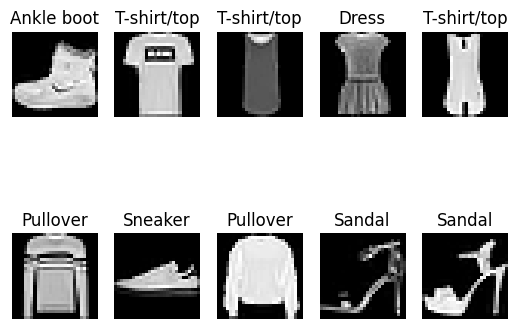

In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i],cmap='gray')
    plt.title(class_names[np.argmax(y_train[i])])

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# CNN model

In [29]:
cnn_model = Sequential ([
    keras.layers.Conv2D(32,(3,3),input_shape = (28,28,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    # keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    # keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_19 (Dense)            (None, 2000)              12546000  
                                                                 
 dense_20 (Dense)            (None, 200)               400200    
                                                                 
 dense_21 (Dense)            (None, 10)                2010      
                                                      

In [30]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_cnn = cnn_model.fit(
    x_train,y_train,
    validation_data = (x_test,y_test),
    epochs = 4,
    batch_size = 64
)

Epoch 1/4
938/938 [==============================] - 144s 153ms/step - loss: 0.3649 - accuracy: 0.8680 - val_loss: 0.2905 - val_accuracy: 0.8913
Epoch 2/4
938/938 [==============================] - 145s 155ms/step - loss: 0.2352 - accuracy: 0.9124 - val_loss: 0.2942 - val_accuracy: 0.8933
Epoch 3/4
938/938 [==============================] - 152s 162ms/step - loss: 0.1898 - accuracy: 0.9295 - val_loss: 0.2413 - val_accuracy: 0.9145
Epoch 4/4
938/938 [==============================] - 152s 162ms/step - loss: 0.1530 - accuracy: 0.9424 - val_loss: 0.2492 - val_accuracy: 0.9143


In [31]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2492 - accuracy: 0.9143


[0.24919763207435608, 0.9143000245094299]

In [32]:
cnn_model.save('model/cnn_model.h5')

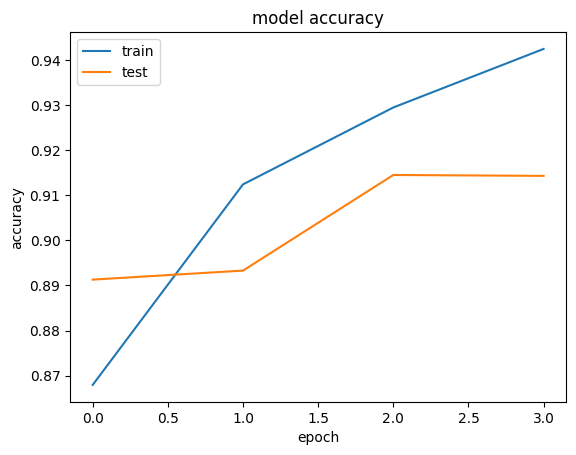

In [34]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

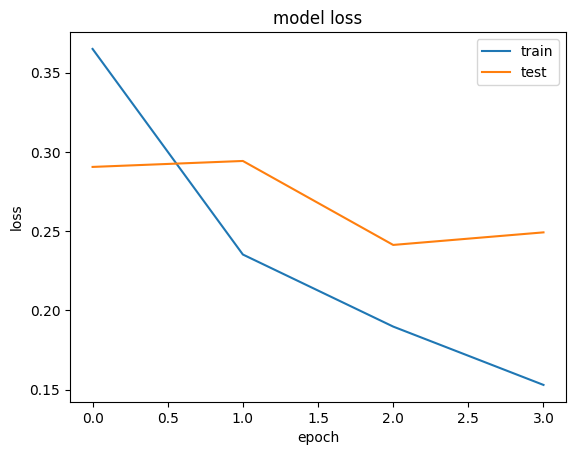

In [35]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()